In [1]:
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import numpy as np

from scipy import stats
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.io
import pandas as pd

import matplotlib.style as style 
from matplotlib.offsetbox import AnchoredText
from context_helper import folders

sns.set(style = 'white', context='poster', rc={"lines.linewidth": 2.5}, font='Arial')
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


import matplotlib.patches as patches
from scipy.interpolate import UnivariateSpline
%matplotlib inline 
%autosave 5

Autosaving every 5 seconds


In [2]:
home_dir = folders['tiger']
results_dir='/Users/manojkumar/Research/context-prediction/outputs/mturk/'
model = 'GPT2'
results_dir= home_dir + 'results/'

sns.set_context('poster')
style.use('seaborn-darkgrid')
style.use('ggplot')

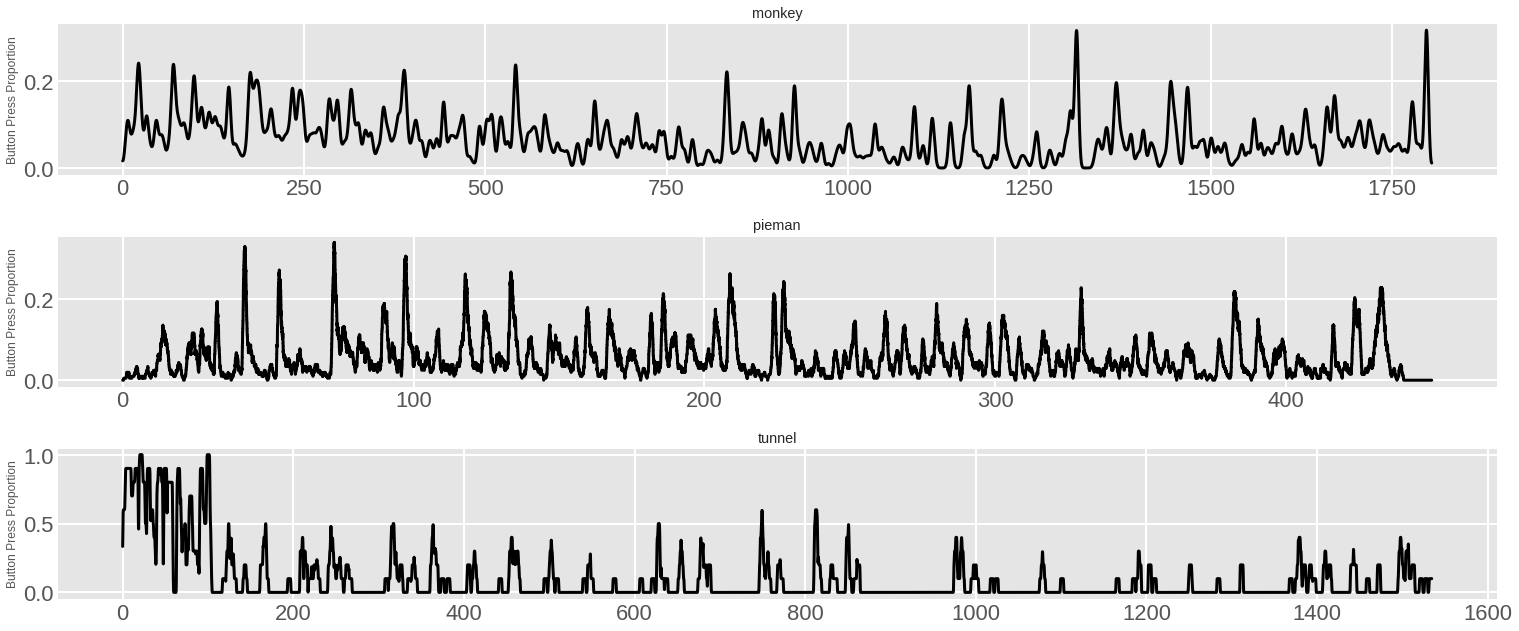

In [3]:
stories =['monkey','pieman','tunnel']

f,ax= plt.subplots(3,1,figsize=[25,10])
for i, pod_name in enumerate(stories):
    if pod_name=='monkey':
        button_file=home_dir + 'outputs/mturk/%s_button_gaussian.csv' % pod_name

    else:
        button_file=home_dir + 'outputs/%s_button_gaussian.csv' % pod_name
    button=pd.read_csv(button_file)
    df_button=button.to_numpy()
    xt= np.arange(0,len(df_button))
    
    if pod_name in ['monkey', 'pieman']:
        xt=xt/1000
    if pod_name in ['tunnel']:
        xt = xt/10
    

    sns.lineplot(x=xt, y=df_button[:,1], ci=None, color='black', ax=ax[i])
    ax[i].set_ylabel('Button Press Proportion')
    ax[i].set_title('%s' % pod_name)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
#plt.savefig(results_dir + 'All_3_stories_button_proportion.png')

## Multiplot

In [4]:
def load_analyses_data(pod_name):
    # New function to load precomputed data
    df_all=pd.DataFrame()
    home_dir = folders['tiger']
    
    print(pod_name)
    #counter=0

    datum_file= home_dir +'/code/podcast-extract-embeddings/results/%s/' % (pod_name) + 'datum.csv'
    surprise_file= home_dir +'/outputs/'  + '%s_processed_df.csv' % pod_name

    datum_data=pd.read_csv(datum_file,  sep=',', header=(0), usecols=range(4))
    df_entr_sur=pd.read_csv(surprise_file,  sep=',', header=(0))
    
    if pod_name=='monkey':
        onset=datum_data['onset']/512
    else:
        onset=datum_data['onset']
    df_entr_sur['onsets']=onset

    df_entr_sur.drop(columns=['Unnamed: 0'], inplace=True)
   
    return df_entr_sur

monkey
pieman
tunnel


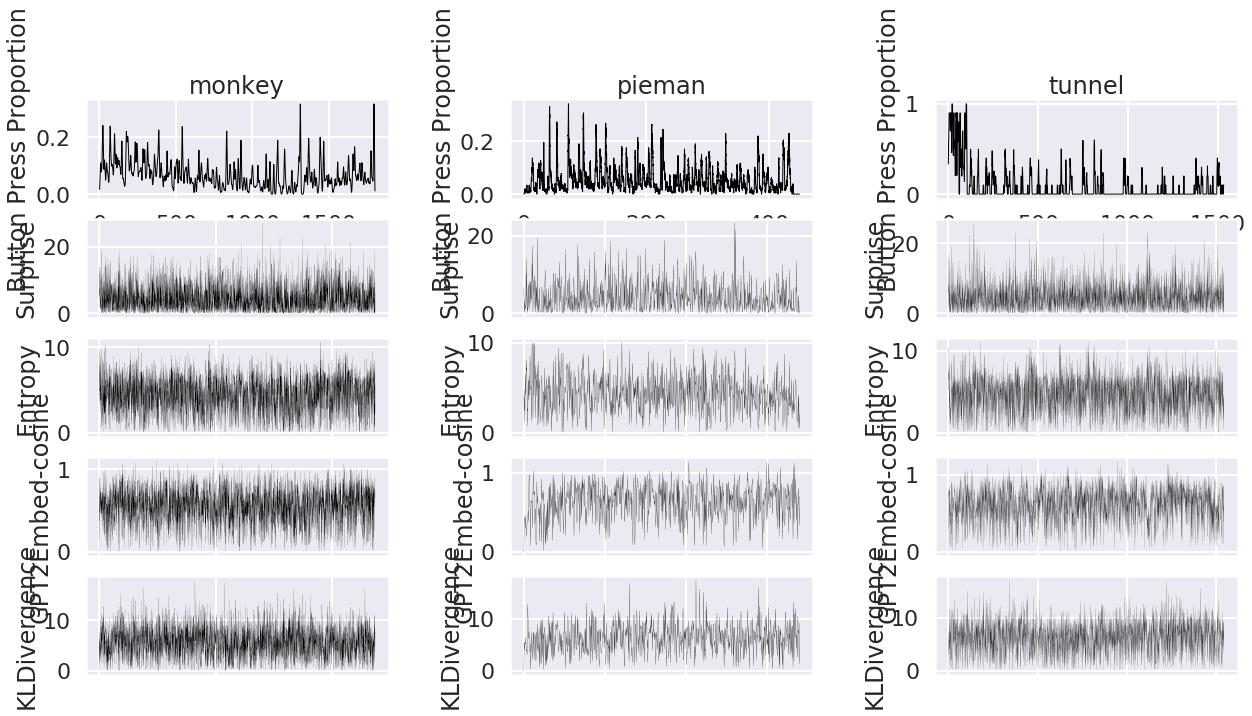

In [5]:
stories =['monkey','pieman','tunnel']
sns.set(context='poster')
f,ax= plt.subplots(5,3,figsize=[20,10])
for i, pod_name in enumerate(stories):
    if pod_name=='monkey':
        button_file=home_dir + 'outputs/mturk/%s_button_gaussian.csv' % pod_name

    else:
        button_file=home_dir + 'outputs/%s_button_gaussian.csv' % pod_name
    button=pd.read_csv(button_file)
    df_button=button.to_numpy()
    xt= np.arange(0,len(df_button))
    
    if pod_name in ['monkey', 'pieman']:
        xt=xt/1000
    if pod_name in ['tunnel']:
        xt = xt/10
    
    lw=1
    sns.lineplot(x=xt, y=df_button[:,1], ci=None, color='black', ax=ax[0,i], linewidth=lw)

    if i==1:
        lw=0.2
    else:
        lw=0.1
    df=load_analyses_data(pod_name)
    sns.lineplot(data=df['Surprise'], ax=ax[1,i],ci=None, color='black', linewidth=lw)
    sns.lineplot(data=df['Entropy'], ax=ax[2,i],ci=None,  color='black',linewidth=lw)
    sns.lineplot(data=df['GPT2Embed-cosine'],ax=ax[3,i],ci=None, color='black', linewidth=lw)
    sns.lineplot(data=df['KLDivergence'], ax=ax[4,i],ci=None, color='black', linewidth=lw)
    ax[0,i].set_ylabel('Button Press Proportion')
    ax[0,i].set_title('%s' % pod_name)
    ax[0,i].set_ylabel('Button Press Proportion')

    ax[1,i].set_xticklabels([])
    ax[2,i].set_xticklabels([])
    ax[3,i].set_xticklabels([])
    ax[4,i].set_xticklabels([])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.2)
#plt.savefig(results_dir + 'All_3_stories_multi_plot.png')